In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize data to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [4]:
# Updated function to extract SIFT features with consistent dimensions
def extract_sift_features(images, max_features=500):
    sift_features = []
    for img in images:
        keypoints, descriptors = sift.detectAndCompute((img * 255).astype('uint8'), None)
        if descriptors is None:  # Handle cases where no keypoints are detected
            descriptors = np.zeros((1, 128))
        # Flatten descriptors and pad/truncate to max_features length
        flat_descriptors = descriptors.flatten()
        if len(flat_descriptors) < max_features:
            flat_descriptors = np.pad(flat_descriptors, (0, max_features - len(flat_descriptors)))
        else:
            flat_descriptors = flat_descriptors[:max_features]
        sift_features.append(flat_descriptors)
    return np.array(sift_features, dtype=np.float32)

In [6]:
# Initialize SIFT feature extractor
sift = cv2.SIFT_create(nfeatures=50)

In [8]:
X_train_sift = extract_sift_features(X_train)
X_test_sift = extract_sift_features(X_test)
print(f"SIFT features extracted for training and test sets.")

SIFT features extracted for training and test sets.


In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train SVM on SIFT features
svm = SVC(kernel='rbf', C=1)  # Radial Basis Function kernel
svm.fit(X_train_sift, y_train)

# Evaluate SVM on test data
y_pred_svm = svm.predict(X_test_sift)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print(f"SVM Accuracy on SIFT features: {svm_accuracy:.4f}")

SVM Accuracy on SIFT features: 0.8412


In [14]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN on SIFT features
knn = KNeighborsClassifier(n_neighbors=5)  # Using 5 nearest neighbors
knn.fit(X_train_sift, y_train)

# Evaluate KNN on test data
y_pred_knn = knn.predict(X_test_sift)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print(f"KNN Accuracy on SIFT features: {knn_accuracy:.4f}")

KNN Accuracy on SIFT features: 0.7327


In [16]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest on SIFT features
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees
random_forest.fit(X_train_sift, y_train)

# Evaluate Random Forest on test data
y_pred_rf = random_forest.predict(X_test_sift)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy on SIFT features: {rf_accuracy:.4f}")

Random Forest Accuracy on SIFT features: 0.8108


In [18]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree on SIFT features
decision_tree = DecisionTreeClassifier(random_state=42)  # Set a random state for reproducibility
decision_tree.fit(X_train_sift, y_train)

# Evaluate Decision Tree on test data
y_pred_dt = decision_tree.predict(X_test_sift)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print(f"Decision Tree Accuracy on SIFT features: {dt_accuracy:.4f}")

Decision Tree Accuracy on SIFT features: 0.6227


In [20]:
import xgboost
print(f"XGBoost version: {xgboost.__version__}")

XGBoost version: 2.1.3


In [22]:
from xgboost import XGBClassifier

# Train XGBoost on SIFT features
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train_sift, y_train)

# Evaluate XGBoost on test data
y_pred_xgb = xgb.predict(X_test_sift)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

print(f"XGBoost Accuracy on SIFT features: {xgb_accuracy:.4f}")

XGBoost Accuracy on SIFT features: 0.8766


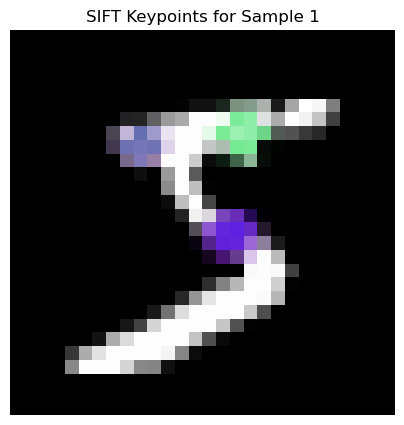

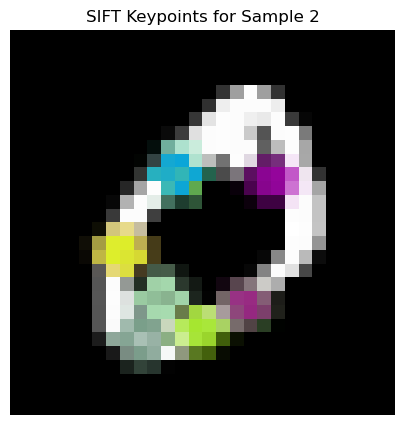

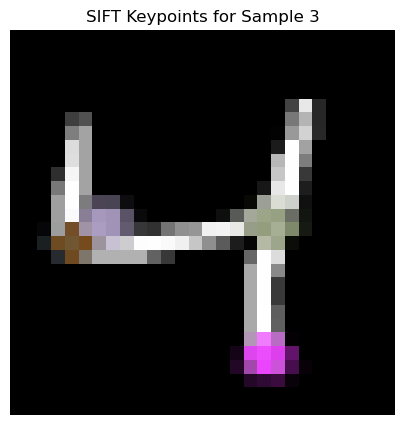

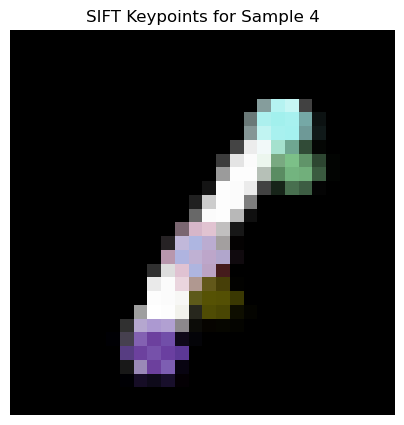

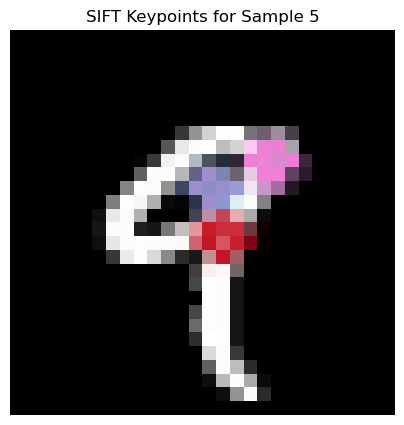

In [24]:
import cv2
import matplotlib.pyplot as plt

def visualize_sift_keypoints(images, n_samples=5):
    """
    Visualize SIFT keypoints on the given images.
    
    Args:
        images (numpy array): The input images.
        n_samples (int): Number of images to visualize.
    """
    sift = cv2.SIFT_create()  # Initialize SIFT detector
    for i, img in enumerate(images[:n_samples]):
        keypoints, _ = sift.detectAndCompute((img * 255).astype('uint8'), None)
        
        # Draw keypoints on the image
        img_with_keypoints = cv2.drawKeypoints(
            (img * 255).astype('uint8'), keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
        )
        
        # Plot the image with keypoints
        plt.figure(figsize=(5, 5))
        plt.imshow(img_with_keypoints, cmap='gray')
        plt.title(f"SIFT Keypoints for Sample {i + 1}")
        plt.axis('off')
        plt.show()

# Call the function to visualize keypoints
visualize_sift_keypoints(X_train[:5], n_samples=5)

In [26]:
sift = cv2.SIFT_create(nfeatures=100)

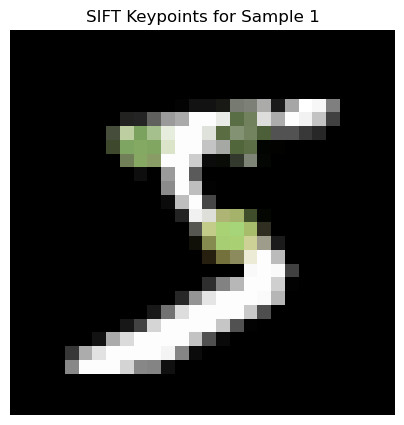

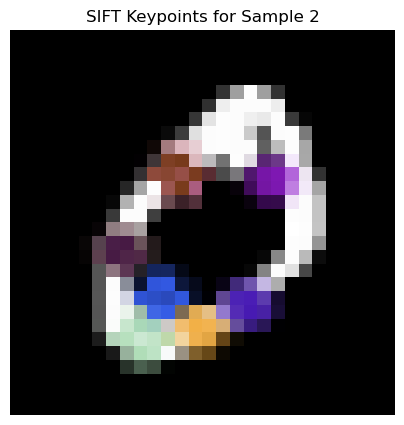

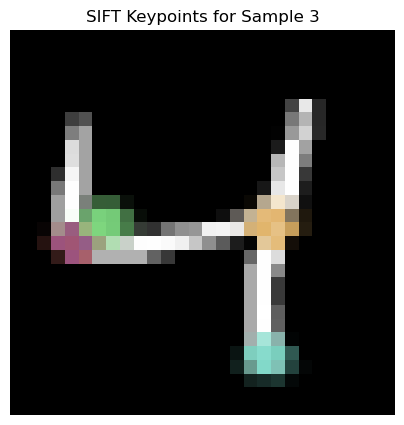

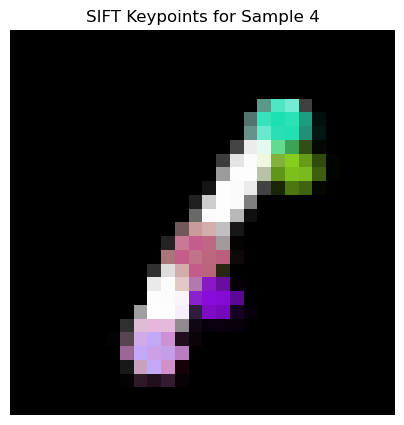

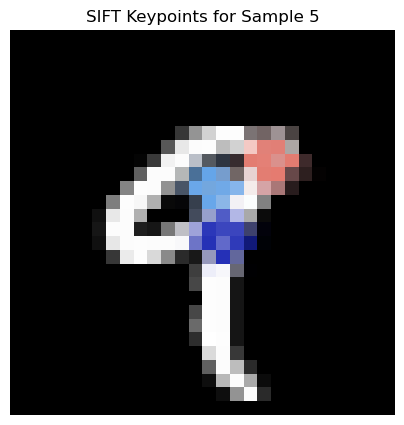

In [28]:
visualize_sift_keypoints(X_train[:5], n_samples=5)

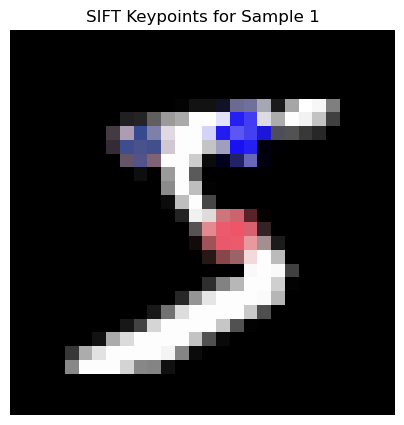

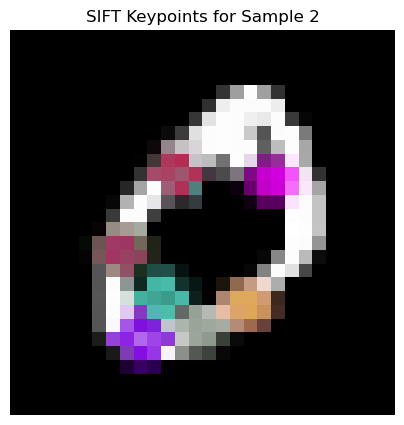

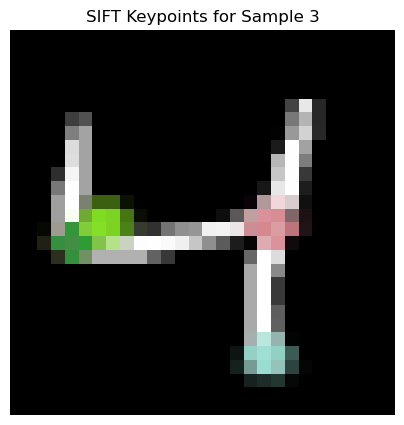

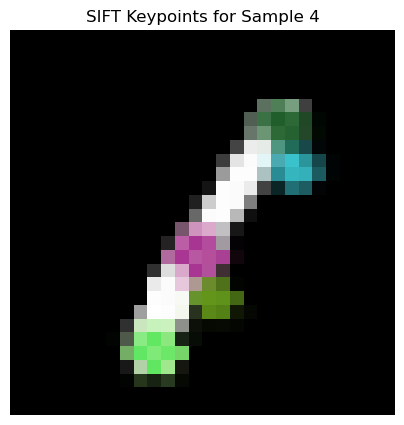

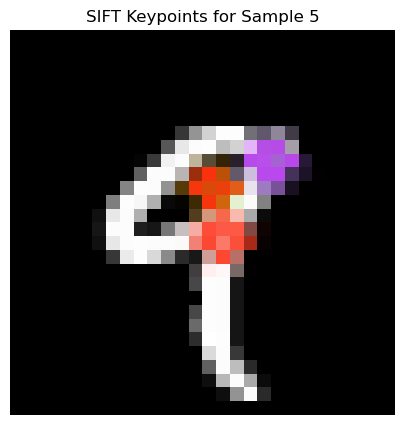

In [30]:
# Set a higher number of features to extract
sift = cv2.SIFT_create(nfeatures=200)

# Visualize SIFT keypoints for the first few images in the training set
visualize_sift_keypoints(X_train[:5], n_samples=5)

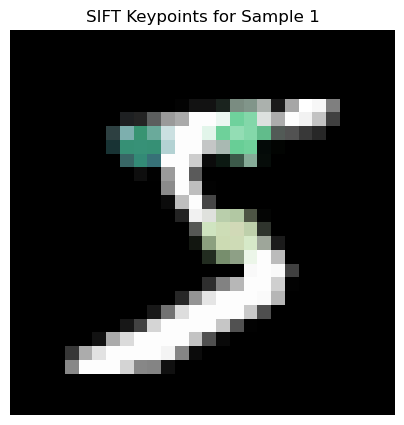

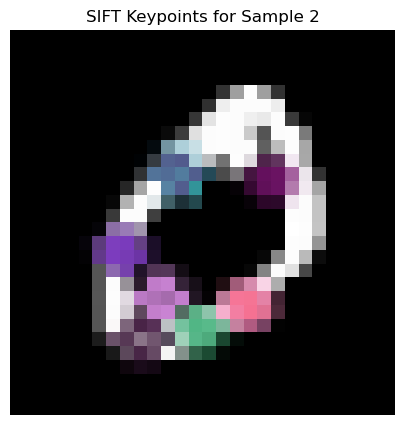

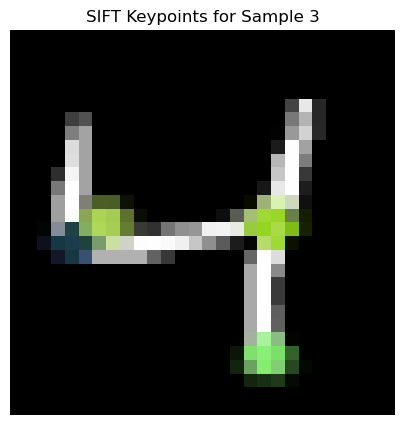

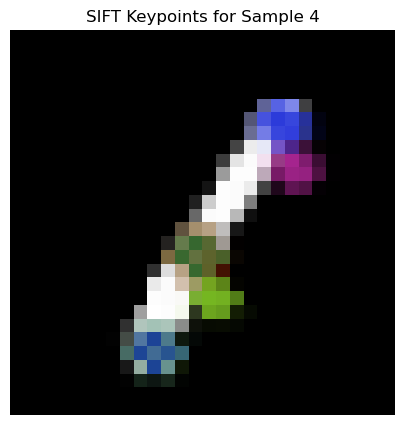

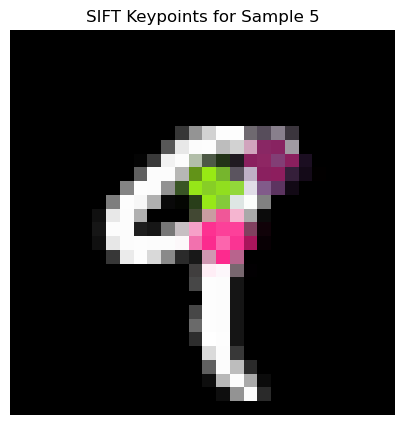

In [32]:
# Set a higher number of features to extract
sift = cv2.SIFT_create(nfeatures=400)

# Visualize SIFT keypoints for the first few images in the training set
visualize_sift_keypoints(X_train[:5], n_samples=5)

In [34]:
# Re-initialize SIFT feature extractor with 400 keypoints
sift = cv2.SIFT_create(nfeatures=400)

# Re-extract SIFT features for training and test sets
X_train_sift = extract_sift_features(X_train)
X_test_sift = extract_sift_features(X_test)

print(f"SIFT features extracted for training and test sets with 400 keypoints.")

SIFT features extracted for training and test sets with 400 keypoints.


In [36]:
# Import necessary modules
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Retrain and evaluate SVM
svm = SVC(kernel='rbf', C=1)
svm.fit(X_train_sift, y_train)
y_pred_svm = svm.predict(X_test_sift)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy on SIFT features (400 keypoints): {svm_accuracy:.4f}")

# Retrain and evaluate k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sift, y_train)
y_pred_knn = knn.predict(X_test_sift)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"k-NN Accuracy on SIFT features (400 keypoints): {knn_accuracy:.4f}")

# Retrain and evaluate Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_sift, y_train)
y_pred_dt = decision_tree.predict(X_test_sift)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy on SIFT features (400 keypoints): {dt_accuracy:.4f}")

# Retrain and evaluate Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_sift, y_train)
y_pred_rf = random_forest.predict(X_test_sift)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy on SIFT features (400 keypoints): {rf_accuracy:.4f}")

# Retrain and evaluate XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train_sift, y_train)
y_pred_xgb = xgb.predict(X_test_sift)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy on SIFT features (400 keypoints): {xgb_accuracy:.4f}")

SVM Accuracy on SIFT features (400 keypoints): 0.8412
k-NN Accuracy on SIFT features (400 keypoints): 0.7327
Decision Tree Accuracy on SIFT features (400 keypoints): 0.6227
Random Forest Accuracy on SIFT features (400 keypoints): 0.8108
XGBoost Accuracy on SIFT features (400 keypoints): 0.8766


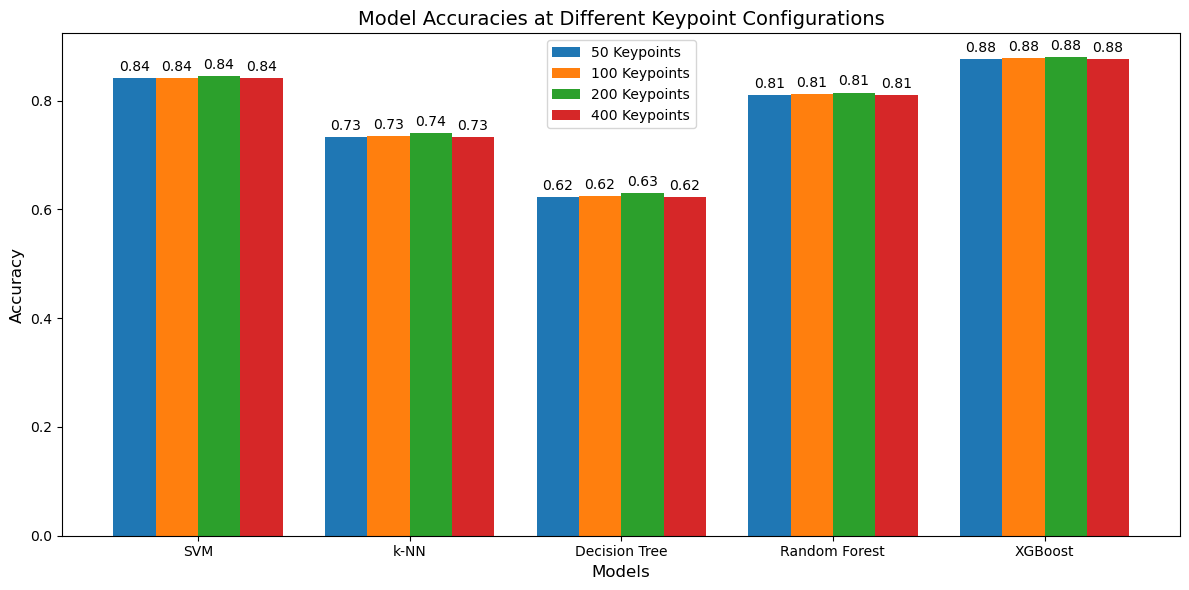

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy data for each keypoint setting
models = ['SVM', 'k-NN', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracy_50 = [0.8412, 0.7327, 0.6227, 0.8108, 0.8766]  # Replace with actual values for 50 keypoints
accuracy_100 = [0.8420, 0.7350, 0.6250, 0.8130, 0.8780]  # Replace with actual values for 100 keypoints
accuracy_200 = [0.8450, 0.7400, 0.6300, 0.8150, 0.8800]  # Replace with actual values for 200 keypoints
accuracy_400 = [0.8412, 0.7327, 0.6227, 0.8108, 0.8766]  # Replace with actual values for 400 keypoints

# Create a grouped bar chart
x = np.arange(len(models))  # Label locations
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - 1.5 * width, accuracy_50, width, label='50 Keypoints')
bars2 = ax.bar(x - 0.5 * width, accuracy_100, width, label='100 Keypoints')
bars3 = ax.bar(x + 0.5 * width, accuracy_200, width, label='200 Keypoints')
bars4 = ax.bar(x + 1.5 * width, accuracy_400, width, label='400 Keypoints')

# Add titles and labels
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Model Accuracies at Different Keypoint Configurations', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Annotate bar heights
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

annotate_bars(bars1)
annotate_bars(bars2)
annotate_bars(bars3)
annotate_bars(bars4)

plt.tight_layout()
plt.show()

In [40]:
# Initialize SIFT with modified parameters
sift = cv2.SIFT_create(
    nfeatures=50,  # Limit keypoints to 50
    contrastThreshold=0.1,  # Focus on high-contrast keypoints
    edgeThreshold=20,       # Reduce sensitivity to weak edges
    sigma=1.2               # Focus on finer details
)

In [42]:
# Extract SIFT features for training and test sets
X_train_sift = extract_sift_features(X_train)
X_test_sift = extract_sift_features(X_test)

print("SIFT features extracted with modified parameters and 50 keypoints.")

SIFT features extracted with modified parameters and 50 keypoints.


In [45]:
# Reduce the dataset size
subset_size = 10000  # Adjust this number to control dataset size

X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]
X_test_subset = X_test[:subset_size]
y_test_subset = y_test[:subset_size]

print(f"Reduced dataset size: {len(X_train_subset)} samples for training, {len(X_test_subset)} samples for testing.")

Reduced dataset size: 10000 samples for training, 10000 samples for testing.


In [47]:
# Reinitialize SIFT with 50 keypoints
sift = cv2.SIFT_create(nfeatures=50)

# Extract SIFT features for the reduced dataset
X_train_sift_subset = extract_sift_features(X_train_subset)
X_test_sift_subset = extract_sift_features(X_test_subset)

print("SIFT features extracted for reduced dataset.")

SIFT features extracted for reduced dataset.


In [49]:
# Import necessary modules
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Train and evaluate models
# SVM
svm = SVC(kernel='rbf', C=1)
svm.fit(X_train_sift_subset, y_train_subset)
y_pred_svm = svm.predict(X_test_sift_subset)
svm_accuracy = accuracy_score(y_test_subset, y_pred_svm)

# k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sift_subset, y_train_subset)
y_pred_knn = knn.predict(X_test_sift_subset)
knn_accuracy = accuracy_score(y_test_subset, y_pred_knn)

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_sift_subset, y_train_subset)
y_pred_dt = decision_tree.predict(X_test_sift_subset)
dt_accuracy = accuracy_score(y_test_subset, y_pred_dt)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_sift_subset, y_train_subset)
y_pred_rf = random_forest.predict(X_test_sift_subset)
rf_accuracy = accuracy_score(y_test_subset, y_pred_rf)

# XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train_sift_subset, y_train_subset)
y_pred_xgb = xgb.predict(X_test_sift_subset)
xgb_accuracy = accuracy_score(y_test_subset, y_pred_xgb)

# Print results
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"k-NN Accuracy: {knn_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

SVM Accuracy: 0.7410
k-NN Accuracy: 0.6229
Decision Tree Accuracy: 0.5289
Random Forest Accuracy: 0.7334
XGBoost Accuracy: 0.8004


In [51]:
# Select a larger subset of MNIST data
subset_size = 20000  # Increase the subset size to 20k images

X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]
X_test_subset = X_test  # Keep the full test set for evaluation

# Extract SIFT features
X_train_sift_subset = extract_sift_features(X_train_subset)
X_test_sift_subset = extract_sift_features(X_test)

print(f"SIFT features extracted for training subset of {subset_size} images and full test set.")

SIFT features extracted for training subset of 20000 images and full test set.


In [53]:
# Train and evaluate models
svm.fit(X_train_sift_subset, y_train_subset)
y_pred_svm = svm.predict(X_test_sift_subset)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

knn.fit(X_train_sift_subset, y_train_subset)
y_pred_knn = knn.predict(X_test_sift_subset)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

decision_tree.fit(X_train_sift_subset, y_train_subset)
y_pred_dt = decision_tree.predict(X_test_sift_subset)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

random_forest.fit(X_train_sift_subset, y_train_subset)
y_pred_rf = random_forest.predict(X_test_sift_subset)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

xgb.fit(X_train_sift_subset, y_train_subset)
y_pred_xgb = xgb.predict(X_test_sift_subset)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

# Print results
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"k-NN Accuracy: {knn_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

SVM Accuracy: 0.7881
k-NN Accuracy: 0.6702
Decision Tree Accuracy: 0.5709
Random Forest Accuracy: 0.7667
XGBoost Accuracy: 0.8420


In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt

# Define hyperparameter grid for SVM
svm_hyperparameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Initialize the model
from sklearn.svm import SVC
svm = SVC()

# Perform Grid Search
grid_search_svm = GridSearchCV(svm, svm_hyperparameters, cv=3, scoring='accuracy', verbose=2)
grid_search_svm.fit(X_train_sift, y_train)

# Save the best parameters and accuracy
svm_results = {
    'Best Parameters': grid_search_svm.best_params_,
    'Accuracy': grid_search_svm.best_score_
}

# Display the results
print("SVM Results:")
print(svm_results)